In [2]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Tehreem Qasim: https://www.linkedin.com/in/tehreem-qasim/

https://www.kaggle.com/datasets/fedesoriano/covid19-effect-on-liver-cancer-prediction-dataset

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/Structured/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


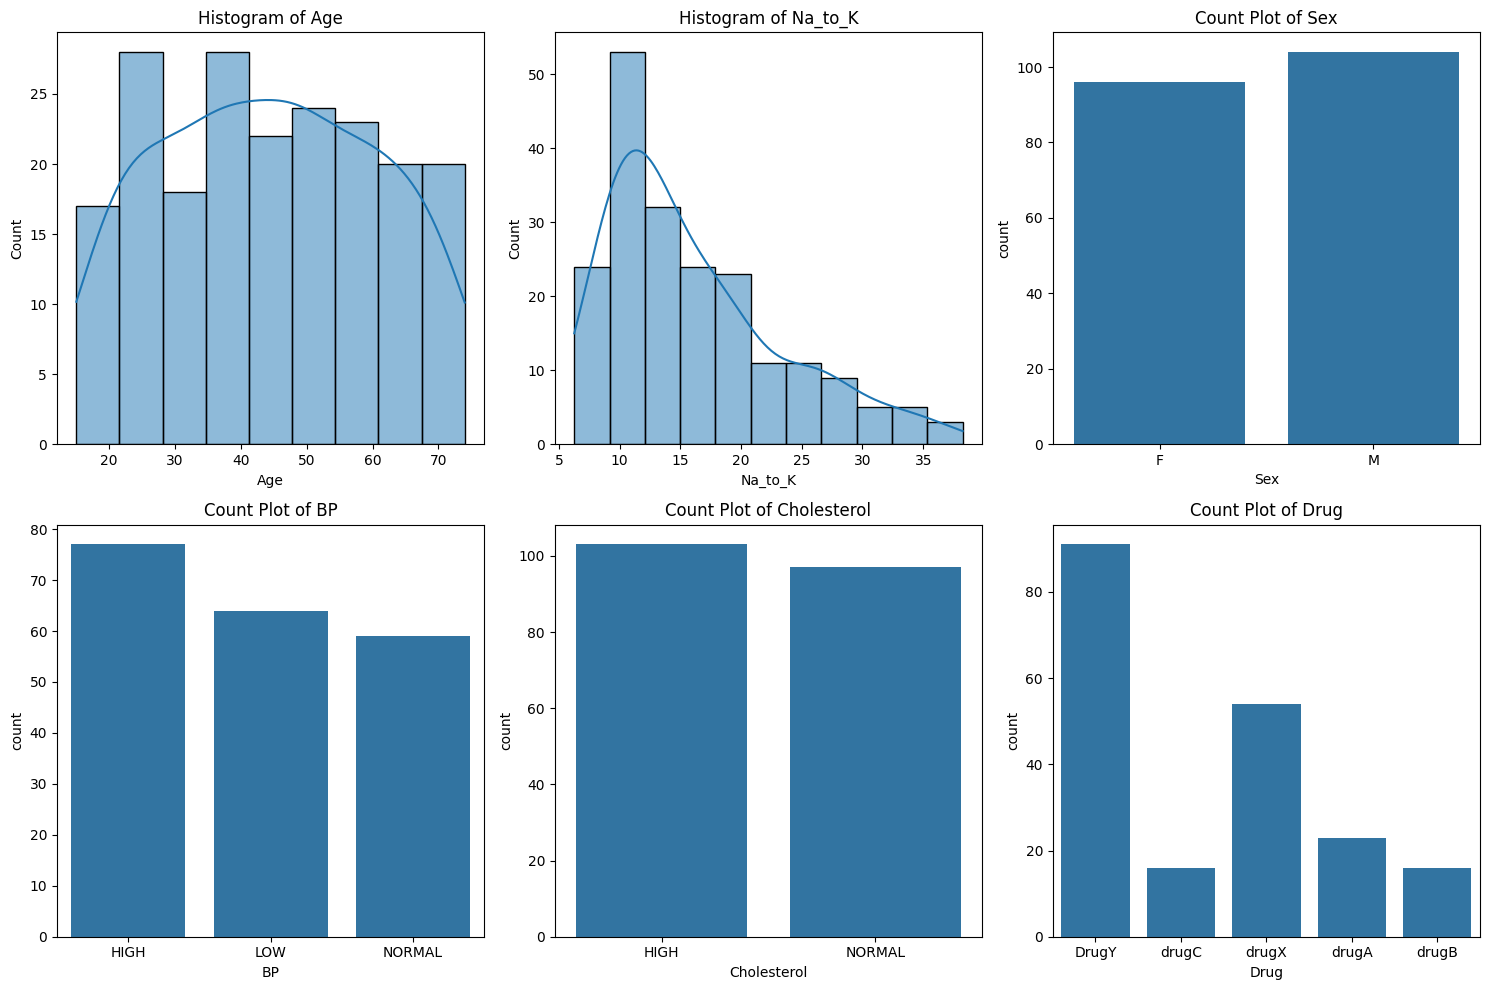

In [7]:
# Doing a little bit of EDA
#Histograms of numerical columns and count plots of categorical columns

import seaborn as sns
import matplotlib.pyplot as plt

# Identifing numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Calculating the number of subplots needed
total_plots = len(num_cols) + len(cat_cols)
cols = 3
rows = (total_plots // cols) + (total_plots % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

# Plotting histograms for numerical columns
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')

# Plotting count plots for categorical columns
for j, col in enumerate(cat_cols, start=len(num_cols)):
    sns.countplot(x=df[col], ax=axes[j])
    axes[j].set_title(f'Count Plot of {col}')

# Remove empty subplots if any
for k in range(total_plots, len(axes)):
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

In [8]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

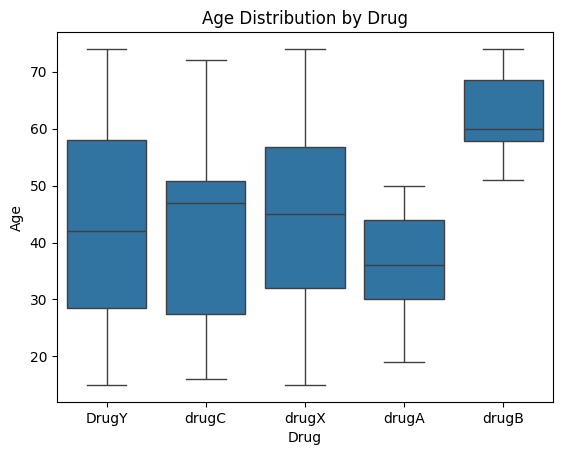

In [9]:
#Age disribution by drug
sns.boxplot(x='Drug', y='Age', data=df)
plt.title('Age Distribution by Drug')
plt.show()


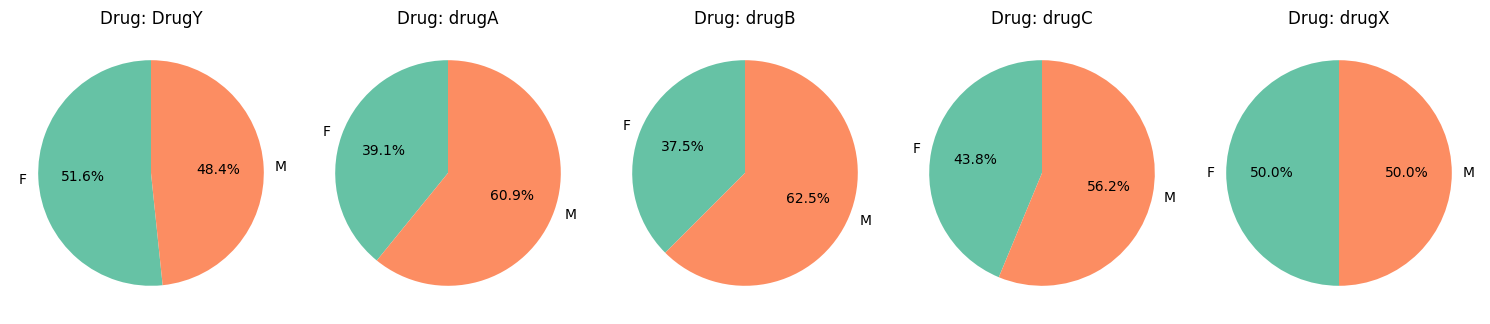

In [16]:
# Drug distribution by Sex
sex_drug_distribution = df.groupby(['Drug', 'Sex']).size().unstack()

# Creating pie charts for each drug
num_drugs = len(sex_drug_distribution.index)
fig, axes = plt.subplots(1, num_drugs, figsize=(15, 7))

# Flattening axes in case there's only one plot
if num_drugs == 1:
    axes = [axes]

# Plot for each drug
for i, drug in enumerate(sex_drug_distribution.index):
    sex_drug_distribution.loc[drug].plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('Set2', len(sex_drug_distribution.columns))
    )
    axes[i].set_ylabel('')  # Removing y-label for clarity
    axes[i].set_title(f'Drug: {drug}')

plt.tight_layout()
plt.show()


In [14]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [17]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [22]:
X = pd.get_dummies(X)


In [23]:
#Balancing the classes

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

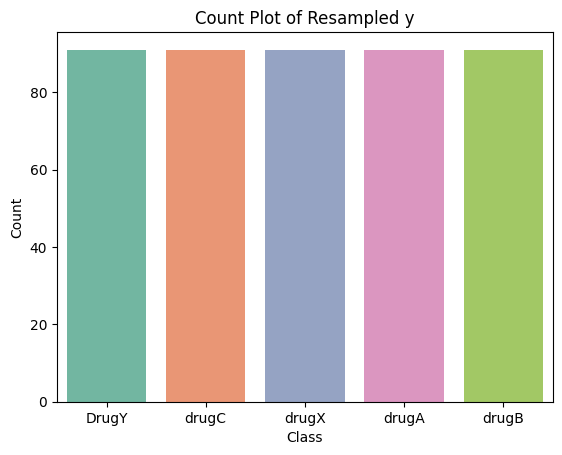

In [36]:
sns.countplot(x=y, palette='Set2', hue = y)


# Add a title and labels
plt.title('Count Plot of Resampled y')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd

# Initialize the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=500, solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Define K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Scale the data using RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Dictionary to store cross-validation results
cv_results = {}

# Perform K-fold cross-validation for each classifier
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, y, cv=kf, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name} - Mean Accuracy: {np.mean(scores):.2f} (+/- {np.std(scores):.2f})")

# Display results in a DataFrame
cv_df = pd.DataFrame(cv_results)
print(cv_df)


Logistic Regression - Mean Accuracy: 0.98 (+/- 0.01)
Decision Tree - Mean Accuracy: 1.00 (+/- 0.00)
Random Forest - Mean Accuracy: 1.00 (+/- 0.00)
SVM - Mean Accuracy: 0.99 (+/- 0.01)
KNN - Mean Accuracy: 0.95 (+/- 0.01)
   Logistic Regression  Decision Tree  Random Forest       SVM       KNN
0             0.967033            1.0            1.0  1.000000  0.967033
1             1.000000            1.0            1.0  0.989011  0.934066
2             0.978022            1.0            1.0  0.978022  0.956044
3             0.989011            1.0            1.0  0.989011  0.934066
4             0.989011            1.0            1.0  0.989011  0.956044
